<a href="https://colab.research.google.com/github/charles01george/02_Humans_or_Not/blob/main/02_Humans_or_Not_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humans or Not Humans

## 1. Import and become one with the data

In [1]:
import os
import tensorflow as tf

In [2]:
data = "drive/MyDrive/02_Humans_or_Not"

In [3]:
os.listdir(data)

['test', 'train']

In [4]:
# View random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (320, 240, 3)


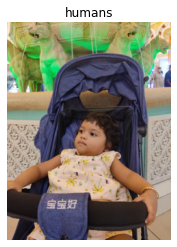

In [5]:
# Visualize data
img = view_random_image(target_dir="drive/MyDrive/02_Humans_or_Not/train/",
                        target_class="humans")

In [6]:
# View the image (array/tensor)
img

array([[[226, 208, 160],
        [247, 225, 186],
        [255, 225, 197],
        ...,
        [255, 227, 207],
        [250, 217, 176],
        [219, 194, 137]],

       [[226, 209, 163],
        [247, 227, 190],
        [255, 229, 202],
        ...,
        [255, 229, 209],
        [239, 208, 162],
        [218, 191, 120]],

       [[226, 211, 168],
        [248, 229, 196],
        [255, 232, 207],
        ...,
        [251, 233, 213],
        [234, 209, 155],
        [215, 184, 102]],

       ...,

       [[188, 154, 117],
        [191, 153, 116],
        [194, 151, 119],
        ...,
        [177, 148, 118],
        [175, 146, 116],
        [173, 144, 114]],

       [[188, 155, 114],
        [191, 153, 117],
        [192, 146, 122],
        ...,
        [176, 147, 117],
        [175, 146, 116],
        [174, 145, 115]],

       [[185, 154, 108],
        [190, 151, 118],
        [190, 144, 121],
        ...,
        [175, 146, 116],
        [175, 146, 116],
        [175, 146, 116]]

In [7]:
# Image shape
img.shape

(320, 240, 3)

Image shape: (320, 240, 3)
Image shape: (320, 240, 3)


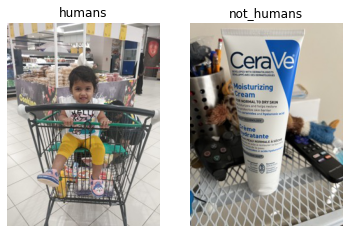

In [8]:
plt.figure()
plt.subplot(1, 2, 1)
humans = view_random_image("drive/MyDrive/02_Humans_or_Not/train/", "humans")
plt.subplot(1, 2, 2)
not_humans = view_random_image("drive/MyDrive/02_Humans_or_Not/train/", "not_humans")

## 2. Preprocess the data(prepare it for a model)

Data is already split into training and test sets.

In [9]:
# Define training and test directory paths
train_dir = "drive/MyDrive/02_Humans_or_Not/train/"
test_dir = "drive/MyDrive/02_Humans_or_Not/test/"

Next step is to turn our data into batches

A batch is a small subset of the dataset a model looks at during training.I am using batch size of 32 and it has proven to be very effctive 

To turn the data into batches, first create an instance of `ImageDataGenerator` for each of our datasets

In [10]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

 The `rescale` parameter, along with 1/255 is divide all of the pizel values by 255(image pixel values were between 0 and 255). This results in all of the images being imported and their pixel values being normalized (converted to be between 0 and 1)

Now got a coulple of ImageDataGenerator instances, it can load our images from their respective directories using the `flow_from_directory` method.

In [11]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),  # (height, width)
                                               class_mode="binary",     # classification problem type
                                               batch_size=32)           # how many images will be in each batch

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 835 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


In [12]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of imgaes/labels
len(images), len(labels)

(32, 32)

Images and labels are in batches of 32.

See what the images look like

In [13]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.9843138 , 0.9921569 , 0.9725491 ],
          [0.35686275, 0.5019608 , 0.3803922 ],
          [0.23529413, 0.4039216 , 0.19215688],
          ...,
          [0.19215688, 0.49411768, 0.1254902 ],
          [0.24313727, 0.50980395, 0.10588236],
          [0.20784315, 0.39607847, 0.        ]],
 
         [[0.909804  , 0.94117653, 0.8470589 ],
          [0.61960787, 0.7137255 , 0.5803922 ],
          [0.5803922 , 0.69411767, 0.5058824 ],
          ...,
          [0.27058825, 0.5254902 , 0.1254902 ],
          [0.227451  , 0.44705886, 0.05882353],
          [0.32156864, 0.47058827, 0.13725491]],
 
         [[0.654902  , 0.67058825, 0.53333336],
          [0.9803922 , 1.        , 0.87843144],
          [0.9333334 , 1.        , 0.83921576],
          ...,
          [0.43137258, 0.62352943, 0.20392159],
          [0.32941177, 0.5058824 , 0.14901961],
          [0.48235297, 0.63529414, 0.38823533]],
 
         ...,
 
         [[0.9843138 , 0.9490197 , 0.9215687 ],
          [0.92156

In [14]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

## 3. Create a model (Baseline)

To begin with, it's good to buile a smaller model to acquite a baseline result which you try to improve upon.

`In deep learning a smaller model often refers to a model with less layers than the state of the art. For instance, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers`

Take a smaller version of the model (3 layer convolutional neural network)

In [15]:
# Make the creating of our model a little easier
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

Typical CNN structure:

`Input -> Conv -> ReLU layer -> Pooling layer -> Fully connected layer as output`

In [16]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_0 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (specify output shape)
])

In [17]:
# Compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 4. Fit the model



In [18]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(27, 8)

In [19]:
# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data), # number of batches a model will go through per epoch
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
27/27 [==============================] - 288s 10s/step - loss: 2.0351 - accuracy: 0.5784 - val_loss: 0.6491 - val_accuracy: 0.6039
Epoch 2/10
27/27 [==============================] - 4s 166ms/step - loss: 0.5259 - accuracy: 0.7629 - val_loss: 0.6039 - val_accuracy: 0.6588
Epoch 3/10
27/27 [==============================] - 6s 210ms/step - loss: 0.3317 - accuracy: 0.8814 - val_loss: 0.5797 - val_accuracy: 0.7451
Epoch 4/10
27/27 [==============================] - 5s 167ms/step - loss: 0.1347 - accuracy: 0.9617 - val_loss: 0.7283 - val_accuracy: 0.6588
Epoch 5/10
27/27 [==============================] - 5s 166ms/step - loss: 0.0675 - accuracy: 0.9868 - val_loss: 0.6730 - val_accuracy: 0.7451
Epoch 6/10
27/27 [==============================] - 6s 207ms/step - loss: 0.0285 - accuracy: 0.9964 - val_loss: 0.7420 - val_accuracy: 0.6941
Epoch 7/10
27/27 [==============================] - 5s 178ms/step - loss: 0.0152 - accuracy: 0.9976 - val_loss: 0.8518 - val_accuracy: 0.7020
Epoch 